<div style="text-align: right"> Tommy Evans-Barton </div>
<div style="text-align: right"> WR Year 2 Jumps </div>

# EDA Post-Cleaning Notebook

This notebook will be analyzing the data after it's transformation and cleaning in order to better inform the model that will be built in the analysis. It is important to have a good understanding of the data being fed into a model before building said model.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
TOP_PATH = os.environ['PWD']

In [4]:
sys.path.append(TOP_PATH + '/src')
sys.path.append(TOP_PATH + '/src/viz')

In [5]:
import eda_viz_post

In [6]:
df = pd.read_csv(TOP_PATH + '/data/final/FINAL_DATA.csv')

### Initial View of Data

Below is just a general description of the numeric data.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rnd,131.0,1.946565,0.787528,1.000000,1.000000,2.000000,3.000000,3.000000
Pick,131.0,46.961832,27.057319,2.000000,25.000000,44.000000,70.500000,97.000000
First Year,131.0,2012.137405,4.346109,2005.000000,2009.000000,2012.000000,2016.000000,2019.000000
Age Draft,131.0,21.946565,0.853166,20.000000,21.000000,22.000000,22.500000,24.000000
G,131.0,13.587786,2.795244,4.000000,12.000000,15.000000,16.000000,16.000000
GS,131.0,6.824427,4.646721,0.000000,3.000000,6.000000,11.000000,16.000000
Tgt,131.0,65.137405,31.170687,11.000000,39.500000,69.000000,86.500000,132.000000
WR Tgt Share,131.0,0.225188,0.111888,0.035230,0.133699,0.212644,0.298890,0.633880
Rec,131.0,37.175573,19.956677,3.000000,21.000000,34.000000,50.500000,92.000000
WR Rec Share,131.0,0.221081,0.116590,0.018868,0.121715,0.216216,0.310052,0.654206


## Missingness in Data
Below is what is still missing within the data, which, as designed, only has missing entries for players drafted in 2019 (due to not having completed a second season yet). These players are going to be the ones who the model is built *for*, but all the other players will be the ones on which the model is *trained, validated, and tested*. Therefore, it makes sense to split this data into two different data sets.

In [8]:
df.isnull().sum()

Rnd                         0
Pick                        0
Team                        0
Player                      0
First Year                  0
Age Draft                   0
G                           0
GS                          0
Tgt                         0
WR Tgt Share                0
Rec                         0
WR Rec Share                0
Ctch%                       0
Yds                         0
WR Yds Share                0
Y/R                         0
TD                          0
WR TD Share                 0
1D                          0
Lng                         0
Y/Tgt                       0
R/G                         0
Y/G                         0
DYAR                        0
YAR                         0
DVOA                        0
VOA                         0
EYds                        0
DPI Pens                    0
DPI Yds                     0
Projected Tgt Share         0
Projected Tgt               0
Projected Rec Share         0
Projected 

In [9]:
df_model = df[df['First Year'] < 2019].reset_index(drop = True)
df_model

,Rnd,Pick,Team,Player,First Year,Age Draft,G,GS,Tgt,WR Tgt Share,...,Projected Rec Share,Projected Rec,Projected Yds Share,Projected Yds,Projected TD Share,Projected TD,Rec Pts First Season,Rec Pts/G First Season,Rec Pts Second Season,Rec Pts/G Second Season
0,1,3,CLE,B.Edwards,2005,22,10.0,7.0,59.0,0.226923,...,0.425007,61.201005,0.498598,981.739542,0.222222,2.000000,69.2,6.920000,124.4,7.775000
1,1,7,MIN,T.Williamson,2005,22,14.0,3.0,52.0,0.180556,...,0.484076,76.000000,0.483380,1047.000000,0.307692,4.000000,49.2,3.514286,45.5,3.250000
2,1,10,DET,M.Williams,2005,21,14.0,4.0,57.0,0.256757,...,0.381579,43.500000,0.257708,374.707921,-0.444444,-4.000000,41.0,2.928571,15.9,1.987500
3,1,21,JAX,M.Jones,2005,22,16.0,1.0,69.0,0.206587,...,0.582418,106.000000,0.563735,1455.000000,0.611111,11.000000,73.2,4.575000,88.3,6.307143
4,1,22,BAL,M.Clayton,2005,23,14.0,10.0,87.0,0.388393,...,0.338462,44.000000,0.305052,471.000000,0.400000,2.000000,59.1,4.221429,123.9,7.743750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2,51,CHI,A.Miller,2018,23,15.0,4.0,54.0,0.192171,...,0.174238,31.537037,0.166698,348.732673,0.400000,6.000000,84.3,5.620000,77.6,4.850000
117,2,60,PIT,J.Washington,2018,22,14.0,6.0,38.0,0.094763,...,0.550607,136.000000,0.532306,1623.000000,0.695652,16.000000,27.7,1.978571,91.5,6.100000
118,2,61,JAX,D.Chark,2018,21,11.0,0.0,32.0,0.109589,...,0.208546,34.618557,0.291061,596.675743,0.148148,1.333333,17.4,1.581818,148.8,9.920000
119,3,81,DAL,M.Gallup,2018,22,16.0,8.0,68.0,0.311927,...,0.787760,107.923077,0.795709,1346.339575,0.677778,6.100000,62.7,3.918750,146.7,10.478571


In [10]:
df_predict = df[df['First Year'] == 2019].reset_index(drop = True)
df_predict

,Rnd,Pick,Team,Player,First Year,Age Draft,G,GS,Tgt,WR Tgt Share,...,Projected Rec Share,Projected Rec,Projected Yds Share,Projected Yds,Projected TD Share,Projected TD,Rec Pts First Season,Rec Pts/G First Season,Rec Pts Second Season,Rec Pts/G Second Season
0,1,25,BAL,M.Brown,2019,22,14.0,11.0,71.0,0.396648,...,0.587719,67.000000,0.605096,855.000000,0.529412,9.000000,100.4,7.171429,NaN,NaN
1,1,32,NWE,N.Harry,2019,21,7.0,5.0,24.0,0.100418,...,0.089903,13.035959,0.103777,173.826648,0.375000,5.250000,22.5,3.214286,NaN,NaN
2,2,36,SFO,D.Samuel,2019,23,15.0,11.0,81.0,0.476471,...,0.338355,37.219016,0.404889,589.114117,0.117172,1.288889,98.2,6.546667,NaN,NaN
3,2,51,TEN,A.Brown,2019,22,16.0,11.0,84.0,0.350000,...,0.492268,78.270642,0.587432,1393.388276,0.750000,12.000000,153.1,9.568750,NaN,NaN
4,2,56,KAN,M.Hardman,2019,21,16.0,5.0,41.0,0.149091,...,0.154762,26.000000,0.213492,538.000000,0.300000,6.000000,89.8,5.612500,NaN,NaN
5,2,57,PHI,J.Arcega-Whiteside,2019,22,16.0,5.0,22.0,0.126437,...,0.485149,49.000000,0.450466,532.000000,0.400000,4.000000,22.9,1.431250,NaN,NaN
6,2,64,SEA,D.Metcalf,2019,21,16.0,15.0,100.0,0.340136,...,0.273404,51.400000,0.264270,719.608358,0.142857,2.857143,132.0,8.250000,NaN,NaN
7,3,66,PIT,D.Johnson,2019,23,16.0,12.0,92.0,0.357977,...,0.418919,62.000000,0.352616,701.000000,0.454545,5.000000,98.0,6.125000,NaN,NaN
8,3,76,WAS,T.McLaurin,2019,23,14.0,14.0,93.0,0.411504,...,0.489692,69.536232,0.556262,960.664050,0.800000,8.000000,133.9,9.564286,NaN,NaN
9,3,93,BAL,M.Boykin,2019,22,16.0,11.0,22.0,0.122905,...,0.298246,34.000000,0.331918,469.000000,0.294118,5.000000,37.8,2.362500,NaN,NaN


## Distribution of Numerical Entries

### Games Distribution

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


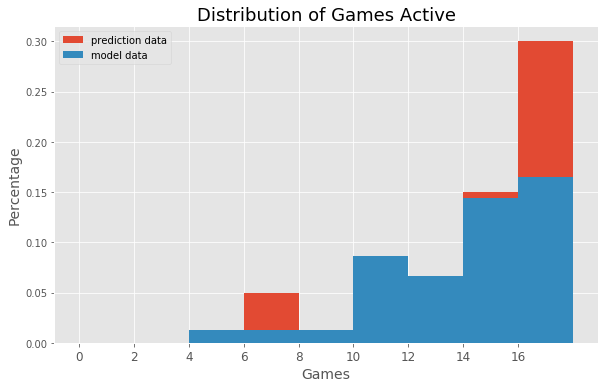

In [49]:
eda_viz_post.game_distribution()

### Games Started Distribution

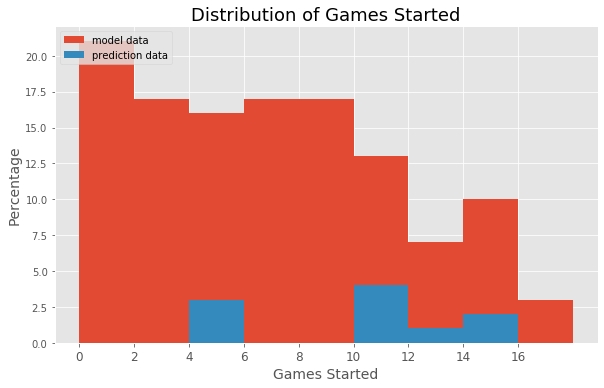

In [51]:
eda_viz_post.gs_distribution()